### Importing required libraries

In [1]:
from src.models.dynamics_models import *
from src.models.cell_models import *
from src.utils import *
import ufl

### Defining a domain, cell model and the whole model and visualizing initial data

In [2]:
domain = rectangle()
cell_model = ReparametrizedFitzHughNagumo(domain)
x = ufl.SpatialCoordinate(domain)

In [3]:
class Model(MonodomainModel):
    def initial_V_m(self):
        # Function that expresses domain where potential is not at rest
        locator = lambda x: (x[0]-0)** 2 + (x[1]-0) ** 2 < 0.1**2
        # Assigning different values of V_m to that area
        cells = fem.locate_dofs_geometrical(self.V1, locator)
        self.V_m_n.x.array[:] = -84
        self.V_m_n.x.array[cells] = np.full_like(cells, -60)

model = Model(domain, cell_model)

In [4]:
model.plot_initial_V_m(show_mesh=False)

Widget(value='<iframe src="http://localhost:40361/index.html?ui=P_0x7f17f57d9710_0&reconnect=auto" class="pyvi…

### Solving equations with given parameters

In [5]:
model.solve(
    T=1000,
    steps=1000,
    lambda_=0.08,
    save_to="demo.mp4",
    signal_point=[0.5, 0.5, 0.0],
)

Solving problem: 100%|██████████| 1000/1000 [05:50<00:00,  2.85it/s]


### Plotting a final plot of transmembrane potential

In [6]:
plot_function(model.V_m_n, "V_m", show_mesh=False)

Widget(value='<iframe src="http://localhost:40361/index.html?ui=P_0x7f17a05465d0_1&reconnect=auto" class="pyvi…

### Plotting a transmembrane potential in a given signal point

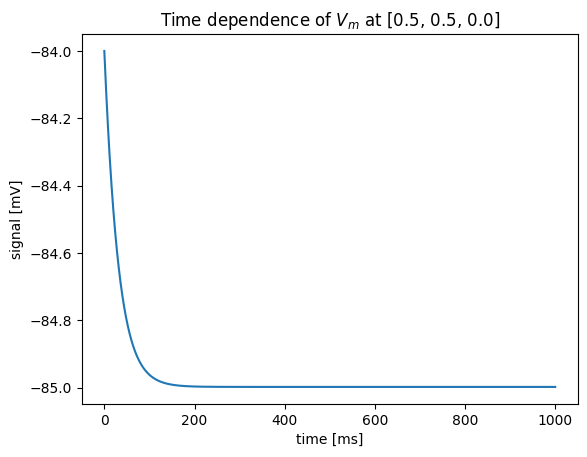

In [7]:
model.plot_signal()

### Plotting a transmembrane potential solution of a cell model

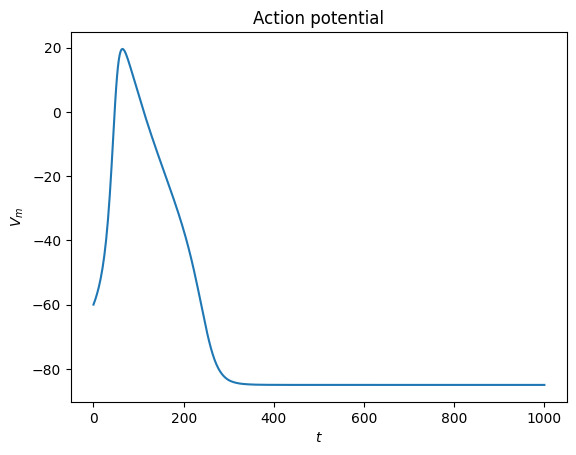

ERROR:wslink.protocol:Exception raised
ERROR:wslink.protocol:KeyError('c9fecb479299a8e7dbe99e56c55b85d0_4225d')
ERROR:wslink.protocol:Traceback (most recent call last):
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/wslink/protocol.py", line 332, in onMessage
    results = func(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/trame_vtk/modules/vtk/protocols/local_rendering.py", line 33, in get_array
    self.context.get_cached_data_array(data_hash, binary)
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/trame_vtk/modules/vtk/serializers/synchronization_context.py", line 30, in get_cached_data_array
    cache_obj = self.data_array_cache[p_md5]
                ~~~~~~~~~~~~~~~~~~~~~^^^^^^^
KeyError: 'c9fecb479299a8e7dbe99e56c55b85d0_4225d'



In [8]:
cell_model.visualize(1000, -60,0)